In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [3]:
# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
train_labels[0] # label은 0~9 사이의 숫자로 정의되어 있음

9

In [6]:
train_labels.dtype

dtype('uint8')

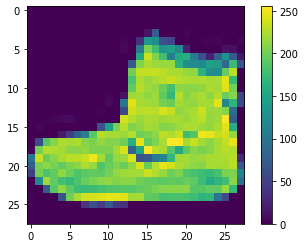

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# 2. 데이터 전처리 - 0에서 255 사이의 값을 갖는 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
# 3. One-hot encoding
train_num = np.unique(train_labels, axis=0)
train_num = train_num.shape[0]
test_num = np.unique(test_labels, axis=0)
test_num = test_num.shape[0]

train_labels.astype('int32') # dtype을 통해 data type을 확인할 수 있음
test_labels.astype('int32')

train_labels = np.eye(train_num)[train_labels]
test_labels = np.eye(test_num)[test_labels]

In [10]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size = 10)

image_batch = train_images[:3] #배치 사이즈 선정 0,1,2의 데이터만 불러오겠다
label_batch = train_labels[:3]
grad_numerical = network.numerical_gradient(image_batch, label_batch) # 수치 미분의 기울기
grad_backprop = network.gradient(image_batch, label_batch) # 오차역전파 기울기

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    # 가중치 매개변수의 차이의 절댓값
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key+ ":" + str(diff))

W1:1.0866923323843561e-09
b1:2.831853630369421e-09
W2:9.750782533579811e-09
b2:1.591573505391186e-07


In [25]:
# 하이퍼 파라미터
iters_num = 2000 # 반복 횟수
train_size = train_images.shape[0]
print(train_size)
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

60000


In [26]:
# 에포크 설정
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    image_batch = train_images[batch_mask]
    label_batch = train_labels[batch_mask]
    
    # 기울기를 계산    
    grad = network.gradient(image_batch, label_batch) # 오차역전파법 방식 (훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(image_batch, label_batch)
    train_loss_list.append(loss)
    
    if i% iter_per_epoch == 0:
        train_acc = network.accuracy(train_images, train_labels)
        test_acc = network.accuracy(test_images, test_labels)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("i : {:4d}\tTrain acc: {:.5f}\tTest acc: {:.5f}\tLoss: {:f}".format(i, train_acc, test_acc, loss))

i :    0	Train acc: 0.11810	Test acc: 0.11110	Loss: 2.290444
i :  600	Train acc: 0.81753	Test acc: 0.80590	Loss: 0.370220
i : 1200	Train acc: 0.84277	Test acc: 0.83110	Loss: 0.383250
i : 1800	Train acc: 0.85257	Test acc: 0.83840	Loss: 0.353286


===========iteration:0===========
SGD loss:2.342800626055038
Momentum loss:2.3276467382652823
AdaGrad loss:3.3658987509780873
Adam loss:2.060516956984996
===========iteration:100===========
SGD loss:0.9817580762562913
Momentum loss:0.4829655228320488
AdaGrad loss:0.4563378559350103
Adam loss:0.40340339647727624
===========iteration:200===========
SGD loss:0.7573490814843079
Momentum loss:0.41925170173137893
AdaGrad loss:0.3644170727962522
Adam loss:0.424619102021037
===========iteration:300===========
SGD loss:0.7297076609103536
Momentum loss:0.5731266583679082
AdaGrad loss:0.5108326929395907
Adam loss:0.5618441170293004
===========iteration:400===========
SGD loss:0.47524856958087874
Momentum loss:0.38739299805584726
AdaGrad loss:0.2958855249884112
Adam loss:0.3051968759296676
===========iteration:500===========
SGD loss:0.7445890118476995
Momentum loss:0.5506630481063283
AdaGrad loss:0.4969901634984105
Adam loss:0.5237483344996506
===========iteration:600===========
SGD loss:0.566470

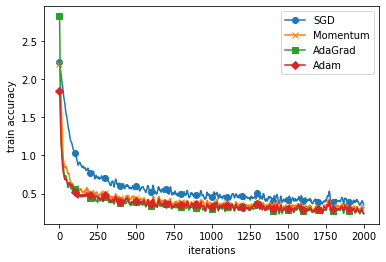

In [40]:
# 다양한 optimizer로 fashion mnist 실행해보기
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
#t_acc = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []
    #t_acc[key] = []
    
# 훈련 진행하기
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    image_batch = train_images[batch_mask]
    label_batch = train_labels[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(image_batch, label_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(image_batch, label_batch)      
        #acc = networks[key].accuracy(train_images, train_labels)     
        train_loss[key].append(loss)     
        #t_acc[key].append(acc)
    
    if i% 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            train_acc = networks[key].accuracy(train_images, train_labels)
            test_acc = networks[key].accuracy(test_images, test_labels)
            loss = networks[key].loss(image_batch, label_batch)
            print(key + " loss:" + str(loss))
            #print(key + " acc:" + str(train_acc) + "\n")


# 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(iters_num)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("train accuracy")
plt.legend()
plt.show()